In [1]:
import os
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import wordcloud
# from nltk.stem import PorterStemmer, SnowballStemmer
nltk.download('stopwords')
stopword_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andreasabia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.chdir('/Users/andreasabia/Documents/ESCP/Consumer Insight & Analytics/Text Analysis/')
df = pd.read_csv('./tweets.csv', engine='python')

##### Preprocessing

In [3]:
raw_tweets=df.text
raw_tweets

0       RT @bill_auclair: Future historians will ackno...
1       RT @Athena_N_London: Our growing group at #Ham...
2       RT @DrMartyFox: Hamas Organized These Terroris...
3       #Facebook Removed More Than 500 Million Fake A...
4       RT @dianefrancis1: #EU privacy laws won't and ...
                              ...                        
1995    #WhytePanther #CountryMusic Like Us on #Facebo...
1996    RT @AnnaBD20: Senator #TedCruz "Social media p...
1997    RT @TalkingMusicPro: Join us LIVE at noon #BST...
1998    When #socialmedia goes tits up [blog]: https:/...
1999    #PR #Lessons From #Facebook #Data Scandal\r\nh...
Name: text, Length: 2000, dtype: object

In [4]:
# Defining functions to clean the data
to_replace = ['[^\w\s]','\d+','\n\nbr','\n br','\xa0','\r','½','\n','\nbr']
def clean_1(series):
    for values in to_replace:
        series=series.str.replace(values," ")
    series=series.astype(str)
    series=series.apply(lambda x: x.lower())
    return series
raw_tweets=clean_1(raw_tweets)
raw_tweets

0       rt  bill_auclair  future historians will ackno...
1       rt  athena_n_london  our growing group at  ham...
2       rt  drmartyfox  hamas organized these terroris...
3        facebook removed more than   million fake acc...
4       rt  dianefrancis    eu privacy laws won t and ...
                              ...                        
1995     whytepanther  countrymusic like us on  facebo...
1996    rt  annabd   senator  tedcruz  social media pl...
1997    rt  talkingmusicpro  join us live at noon  bst...
1998    when  socialmedia goes tits up  blog   https  ...
1999     pr  lessons from  facebook  data scandal  htt...
Name: text, Length: 2000, dtype: object

In [5]:
tokenizer = RegexpTokenizer("[\w']+")
tokenized_tweets = raw_tweets.apply(lambda x: tokenizer.tokenize(x))
tokenized_tweets

0       [rt, bill_auclair, future, historians, will, a...
1       [rt, athena_n_london, our, growing, group, at,...
2       [rt, drmartyfox, hamas, organized, these, terr...
3       [facebook, removed, more, than, million, fake,...
4       [rt, dianefrancis, eu, privacy, laws, won, t, ...
                              ...                        
1995    [whytepanther, countrymusic, like, us, on, fac...
1996    [rt, annabd, senator, tedcruz, social, media, ...
1997    [rt, talkingmusicpro, join, us, live, at, noon...
1998    [when, socialmedia, goes, tits, up, blog, http...
1999    [pr, lessons, from, facebook, data, scandal, h...
Name: text, Length: 2000, dtype: object

In [6]:
newStopWords = ['https','co','amp']
stopword_list.extend(newStopWords)
def remove_stopwords(text):
    words = [w for w in text if w not in stopword_list]
    return words
clean_series = tokenized_tweets.apply(lambda x: remove_stopwords(x))
clean_series

0       [rt, bill_auclair, future, historians, acknowl...
1       [rt, athena_n_london, growing, group, hampstea...
2       [rt, drmartyfox, hamas, organized, terrorist, ...
3       [facebook, removed, million, fake, accounts, f...
4       [rt, dianefrancis, eu, privacy, laws, regulate...
                              ...                        
1995    [whytepanther, countrymusic, like, us, faceboo...
1996    [rt, annabd, senator, tedcruz, social, media, ...
1997    [rt, talkingmusicpro, join, us, live, noon, bs...
1998    [socialmedia, goes, tits, blog, odnxvxgkkv, so...
1999    [pr, lessons, facebook, data, scandal, yah, im...
Name: text, Length: 2000, dtype: object

In [7]:
def alpha_length(text):
    new_text = [w for w in text if w.isalpha() and len(w) > 1]
    return new_text
clean_tweets = clean_series.apply(lambda x: alpha_length(x))
clean_tweets

0       [rt, future, historians, acknowledge, alfabank...
1       [rt, growing, group, hampstead, seat, availabl...
2       [rt, drmartyfox, hamas, organized, terrorist, ...
3       [facebook, removed, million, fake, accounts, f...
4       [rt, dianefrancis, eu, privacy, laws, regulate...
                              ...                        
1995    [whytepanther, countrymusic, like, us, faceboo...
1996    [rt, annabd, senator, tedcruz, social, media, ...
1997    [rt, talkingmusicpro, join, us, live, noon, bs...
1998    [socialmedia, goes, tits, blog, odnxvxgkkv, so...
1999    [pr, lessons, facebook, data, scandal, yah, im...
Name: text, Length: 2000, dtype: object

In [8]:
def join(text):
    text= " ".join([i for i in text])
    return text
full_tweets = clean_tweets.apply(lambda x: join(x))
full_tweets

0       rt future historians acknowledge alfabank camb...
1       rt growing group hampstead seat available soci...
2       rt drmartyfox hamas organized terrorist attack...
3       facebook removed million fake accounts first q...
4       rt dianefrancis eu privacy laws regulate faceb...
                              ...                        
1995    whytepanther countrymusic like us facebook rhg...
1996    rt annabd senator tedcruz social media platfor...
1997    rt talkingmusicpro join us live noon bst today...
1998    socialmedia goes tits blog odnxvxgkkv socialme...
1999          pr lessons facebook data scandal yah imxvxr
Name: text, Length: 2000, dtype: object

In [9]:
unique_string=(" ").join(full_tweets)
unique_string[0:200]

'rt future historians acknowledge alfabank cambridgeanalytica facebook data breach similar events indi rt growing group hampstead seat available socialmediamarketer things facebook twitt rt drmartyfox '

### Tasks
##### Which words are most commonly used in the dataset?
Unsurprisingly, Facebook and RT appear the most amount of times. Looking at a bar chart, we can see that there are also lots of mentions towards social media words, such as instagram, social, twitter... There are also mentions of terrorsit attacks. This can be seen in output 11.

##### Do you find anything interesting when looking at a word cloud of the data?
Obviously the results are rather similar to the bar charts, just presented differently. This can be seen in output 12.

##### Does this change if we look at the tf_idf logic?
By checking the mean of every word in the tfidf, the words that are most common seem to also be the most important throughout the corpus. This can be seen in output 15.

##### What are the most common sentiments in the tweets?
The most common words in tweets are positive, followed by words which express feelings of trust. The least expressed sentiments are disgust and sadness. This can be seen in output 22.

##### Are the posts about facebook rather positive, or rather negative?
65% of tweets mentioning facebook are rather positive. This can be seen in output 24.

In [10]:
word_counts = pd.value_counts(clean_tweets.apply(pd.Series).stack())
word_counts.head(20)

facebook       1682
rt              963
socialmedia     199
instagram       138
data            137
us              128
new             114
like            111
page            110
social          108
twitter         104
marketing        98
women            96
read             93
apps             92
look             91
front            90
terrorist        88
protests         86
attacks          86
dtype: int64

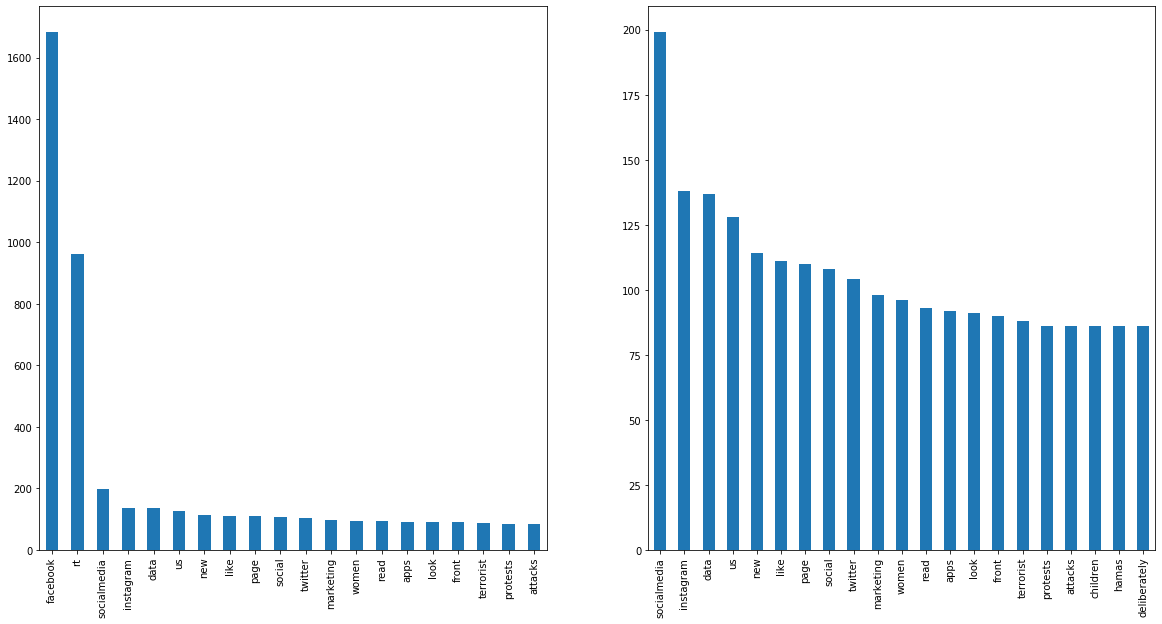

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
word_counts.head(20).plot(ax=axes[0],kind='bar')
word_counts[2:23].plot(ax=axes[1], kind='bar')
plt.show()

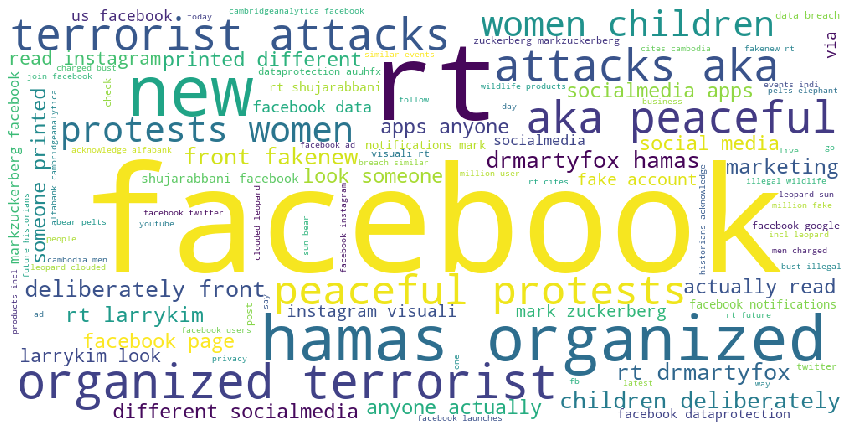

In [12]:
wcloud = wordcloud.WordCloud(width = 1000, height = 500, background_color='white', max_words=100).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wcloud)
plt.axis("off")
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(full_tweets)
feature_names= vectorizer.get_feature_names()
dense=vectors.todense()
denselist=dense.tolist()
TFIDF = pd.DataFrame(denselist, columns=feature_names)

In [14]:
howtosort=word_counts.index.tolist()
new_columns = howtosort + (TFIDF.columns.drop(howtosort).tolist())
TFIDF = TFIDF[new_columns]
TFIDF.iloc[:20,:20]

,facebook,rt,socialmedia,instagram,data,us,new,like,page,social,twitter,marketing,women,read,apps,look,front,terrorist,protests,attacks
0,0.083851,0.111379,0.0,0.00000,0.238934,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.064894,0.086199,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.115799,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.268996,0.0,0.0,0.0,0.273261,0.274746,0.276264,0.276264
3,0.063550,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.056577,0.075152,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
5,0.073512,0.097646,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
6,0.031258,0.041520,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
7,0.059976,0.000000,0.0,0.16886,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.186021,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
8,0.079636,0.105781,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
9,0.065509,0.087016,0.0,0.00000,0.186669,0.000000,0.000000,0.199121,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


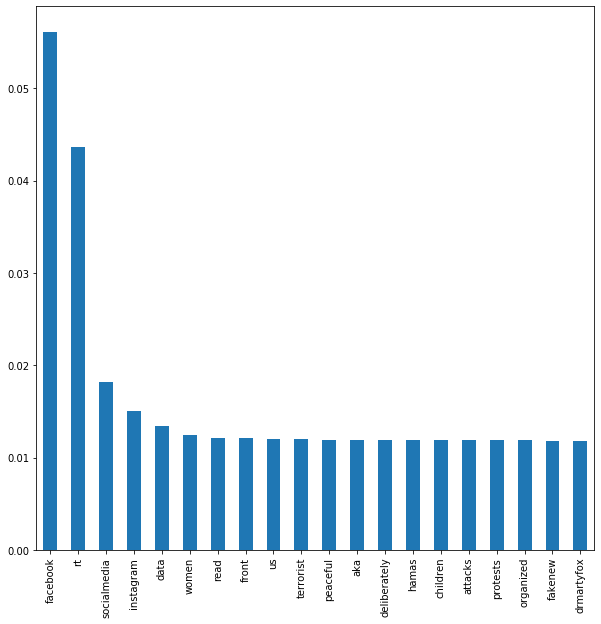

In [15]:
mean_value_TFIDF = TFIDF.mean(skipna=False)
plt.figure(figsize=(10,10))
mean_value_TFIDF.sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

In [16]:
# importing sentiment lexicon
df= pd.read_excel("./NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx")
sentiment_dictionary = pd.merge(df.iloc[:,0:1].reset_index(drop=True),
                                df.iloc[:,105:].reset_index(drop=True),
                                left_index=True,
                                right_index=True)
sentiment_dictionary

,English (en),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14177,zone,0,0,0,0,0,0,0,0,0,0
14178,zoo,0,0,0,0,0,0,0,0,0,0
14179,zoological,0,0,0,0,0,0,0,0,0,0
14180,zoology,0,0,0,0,0,0,0,0,0,0


In [17]:
# removing unimportant words from the corpus
sentiment_words=sentiment_dictionary["English (en)"].tolist()
tweet_words=TFIDF.columns.tolist()
tfidf_cols_todrop=[]
for i in tweet_words:
    if i not in sentiment_words:
        tfidf_cols_todrop.append(i)
#formatting the TFIDF dataframe for further computation
TFIDF_clean=TFIDF.drop(tfidf_cols_todrop, axis=1)
TFIDF_clean=np.ceil(TFIDF_clean).astype(int)
TFIDF_clean

,data,page,social,read,front,terrorist,organized,peaceful,million,media,...,cut,gritty,virtually,politics,extra,convenient,minimize,happen,legally,suggest
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#removing dimensions of the lexicon, to decrease computational time
sentiment_words=sentiment_dictionary["English (en)"].tolist()
tweet_words=TFIDF_clean.columns.tolist()
sentiment_index_todrop=[]
for i in range(len(sentiment_words)):
    if sentiment_words[i] not in tweet_words:
        sentiment_index_todrop.append(i)
sentiment_dictionary_reduced=sentiment_dictionary.drop(sentiment_index_todrop)
sentiment_dictionary_reduced.set_index("English (en)",inplace=True)
sentiment_dictionary_reduced

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
English (en),,,,,,,,,,
ability,1,0,0,0,0,0,0,0,0,0
abuse,0,1,1,0,1,1,0,1,0,0
acceptance,1,0,0,0,0,0,0,0,0,0
access,0,0,0,0,0,0,0,0,0,0
accidental,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
yesterday,0,0,0,0,0,0,0,0,0,0
young,1,0,0,1,0,0,1,0,1,0
younger,1,0,0,0,0,0,0,0,0,0


In [19]:
#Matching every tweet with the sentiment lexicon
overall_sent=[]
individual_sent=[]
for l in range(len(clean_tweets)):
    for w in range(len(clean_tweets[l])):
        if clean_tweets[l][w] in sentiment_dictionary_reduced.index:
            individual_sent.append(sentiment_dictionary_reduced.loc[clean_tweets[l][w]].values)
    overall_sent.append(np.sum(individual_sent, axis=0))
    individual_sent=[]

In [20]:
#Finding all the tweets that had no sentiment, and deleting them by their index
index_to_delete=[]
for i in range(len(overall_sent)):
    if type(overall_sent[i]) is not np.ndarray:
        index_to_delete.append(i)

new_overall_sent=[]
for i in range(len(overall_sent)):
    if i not in index_to_delete:
        new_overall_sent.append(overall_sent[i])

In [21]:
tweets_sentiment=pd.DataFrame(new_overall_sent, columns=sentiment_dictionary_reduced.columns)
tweets_sentiment

,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,1,1,1,2,1
3,1,1,0,0,0,0,1,0,0,1
4,2,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1913,0,0,0,0,0,0,0,0,0,1
1914,1,2,2,1,1,2,1,2,1,1
1915,1,1,1,0,1,1,0,1,1,1
1916,1,0,0,0,0,0,0,0,0,0


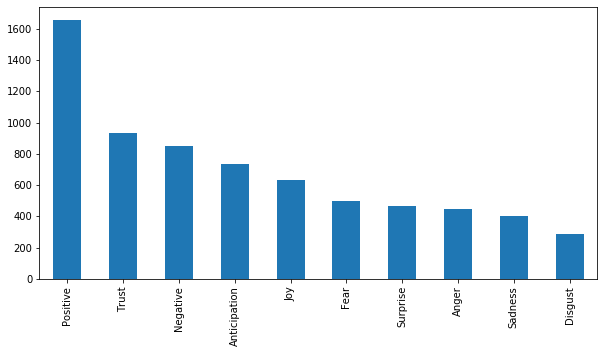

In [22]:
plt.figure(figsize=(10,5))
tweets_sentiment.sum(axis=0).sort_values(ascending=False).plot(kind='bar')
plt.show()

In [23]:
# Merging the tweets with the sentiments, to select the tweets which talk about facebook
TFIDF_intermediate=np.ceil(TFIDF).astype(int)
TFIDF_intermediate=TFIDF_intermediate['facebook']
TFIDF_intermediate.drop(index_to_delete, axis=0, inplace=True)
TFIDF_intermediate.reset_index(drop=True,inplace=True)
facebook_sentiment = pd.concat([TFIDF_intermediate, tweets_sentiment], axis=1)
facebook_sentiment=facebook_sentiment[facebook_sentiment['facebook']==1]
facebook_sentiment

,facebook,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,1,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,1,0,0,1
4,1,2,0,0,0,0,0,0,0,0,1
5,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1909,1,0,0,0,0,0,0,0,0,0,0
1910,1,1,0,0,1,0,0,1,0,0,0
1912,1,0,0,0,0,0,0,0,0,0,1
1913,1,0,0,0,0,0,0,0,0,0,1


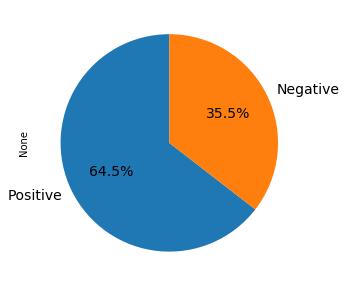

In [24]:
plt.figure(figsize=(5,5))
facebook_sentiment.loc[:,"Positive":"Negative"].sum().plot(kind='pie',autopct='%1.1f%%', 
 startangle=90, shadow=False, legend = False, fontsize=14)
plt.show()